In [2]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"shruthik16","key":"70b21a59bfddc82e19f3d613faf16568"}'}

In [4]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [5]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

covid-cxr-image-dataset-research.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
replace COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.


In [8]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [9]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['person348_virus_723.jpeg']
image shape (760, 1296)


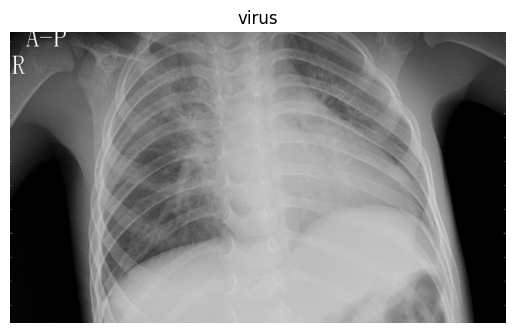

In [10]:
img = view_image("/content/COVID_IEEE/","virus")

['IM-0491-0001-0002.jpeg']
image shape (1414, 1604)


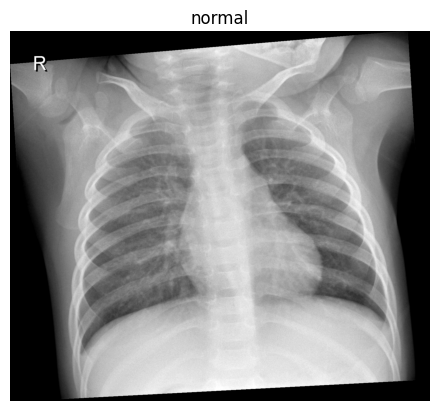

In [11]:
img = view_image("/content/COVID_IEEE/","normal")

['kjr-21-e24-g003-l-a.jpg']
image shape (448, 425, 3)


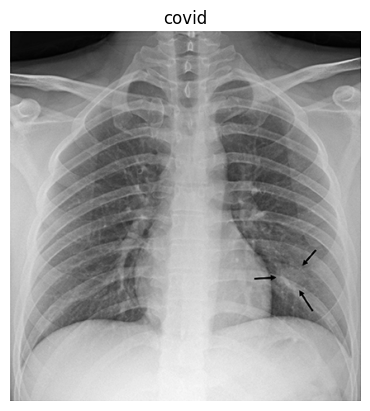

In [12]:
img = view_image("/content/COVID_IEEE/","covid")

In [13]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [14]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [15]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(2)

In [16]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [18]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [20]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 25s 310ms/step - loss: 0.9415 - accuracy: 0.5461 - val_loss: 0.6911 - val_accuracy: 0.7009
Epoch 2/15
32/32 [==============================] - 5s 144ms/step - loss: 0.5087 - accuracy: 0.8147 - val_loss: 0.3504 - val_accuracy: 0.8904
Epoch 3/15
32/32 [==============================] - 4s 140ms/step - loss: 0.3324 - accuracy: 0.8775 - val_loss: 0.3620 - val_accuracy: 0.8813
Epoch 4/15
32/32 [==============================] - 4s 140ms/step - loss: 0.2223 - accuracy: 0.9216 - val_loss: 0.2234 - val_accuracy: 0.9224
Epoch 5/15
32/32 [==============================] - 4s 137ms/step - loss: 0.2201 - accuracy: 0.9294 - val_loss: 0.3396 - val_accuracy: 0.8653
Epoch 6/15
32/32 [==============================] - 4s 135ms/step - loss: 0.2532 - accuracy: 0.9137 - val_loss: 0.3095 - val_accuracy: 0.8995
Epoch 7/15
32/32 [==============================] - 4s 137ms/step - loss: 0.1559 - accuracy: 0.9382 - val_loss: 0.2806 - val_accuracy: 0.9269
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

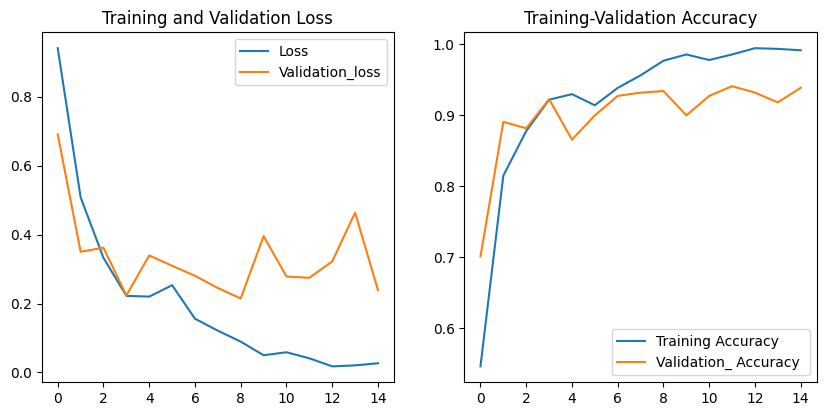

In [21]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [22]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 1s 98ms/step


In [23]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.92      0.98      0.95       129
           2       0.98      0.89      0.93       128

    accuracy                           0.95       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365



In [24]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,107,1,0
normal,1,126,2
virus,4,10,114


In [25]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

In [26]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [27]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [29]:
model.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=32)

Epoch 1/15
32/32 [==============================] - 8s 149ms/step - loss: 7.3979 - accuracy: 0.7902 - val_loss: 2.2946 - val_accuracy: 0.8904
Epoch 2/15
32/32 [==============================] - 3s 80ms/step - loss: 1.6840 - accuracy: 0.9176 - val_loss: 1.0303 - val_accuracy: 0.9475
Epoch 3/15
32/32 [==============================] - 4s 112ms/step - loss: 0.3196 - accuracy: 0.9696 - val_loss: 0.3616 - val_accuracy: 0.9680
Epoch 4/15
32/32 [==============================] - 4s 112ms/step - loss: 0.0740 - accuracy: 0.9873 - val_loss: 0.3384 - val_accuracy: 0.9680
Epoch 5/15
32/32 [==============================] - 3s 88ms/step - loss: 0.0539 - accuracy: 0.9912 - val_loss: 0.2303 - val_accuracy: 0.9795
Epoch 6/15
32/32 [==============================] - 3s 82ms/step - loss: 0.0258 - accuracy: 0.9951 - val_loss: 0.3448 - val_accuracy: 0.9726
Epoch 7/15
32/32 [==============================] - 2s 77ms/step - loss: 0.0092 - accuracy: 0.9990 - val_loss: 0.3846 - val_accuracy: 0.9726
Epoch 8/15

Text(0.5, 1.0, 'Training-Validation Accuracy')

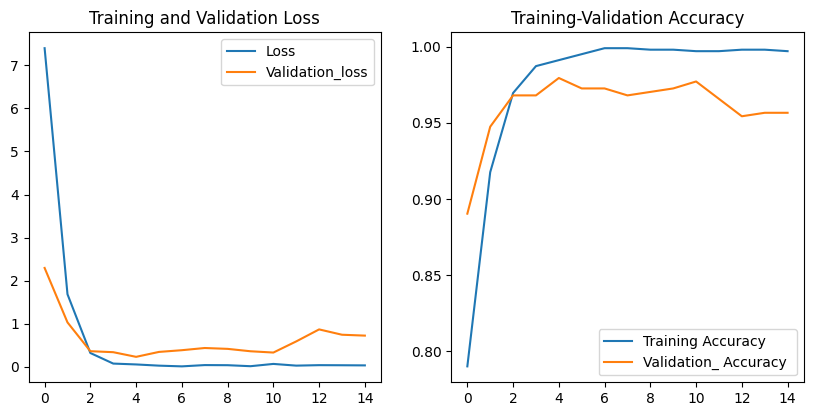

In [30]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [31]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 1s 70ms/step


In [32]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.89      0.98      0.94       129
           2       0.98      0.88      0.93       128

    accuracy                           0.95       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365



In [33]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,106,2,0
normal,0,127,2
virus,2,13,113


In [38]:
model.save("covid_model.h5")  # Save the model as an HDF5 file


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
!ls



 covid-cxr-image-dataset-research.zip   covid_model.h5	  'kaggle (2).json'   sample_data
 COVID_IEEE			       'kaggle (1).json'   kaggle.json


In [45]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("covid_model.h5")  # Replace with the path to your model file

# Load and preprocess the image you want to predict
image_path = "/content/COVID_IEEE/normal/NORMAL2-IM-0815-0001.jpeg"  # Replace with the path to your image
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img = img / 255.0  # Normalize the image

# Reshape the image to match the model's input shape
img = np.reshape(img, (1, 224, 224, 3))

# Make predictions
predictions = model.predict(img)

# Interpret the results
class_names = ["covid", "normal", "virus"]
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

print(f"The image is predicted as: {predicted_class}")


1/1 [==============================] - 0s 430ms/step
The image is predicted as: normal
